<a href="https://colab.research.google.com/github/debashisdotchatterjee/Covid-Paper-Time-Series-Forecasting-2025/blob/main/aFRESH_Covid_4th_Paper_(Time_Series%2BForecasting)_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

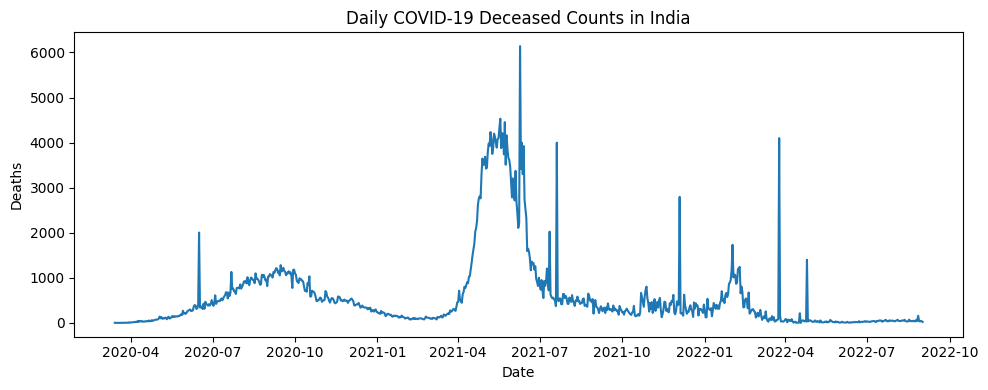

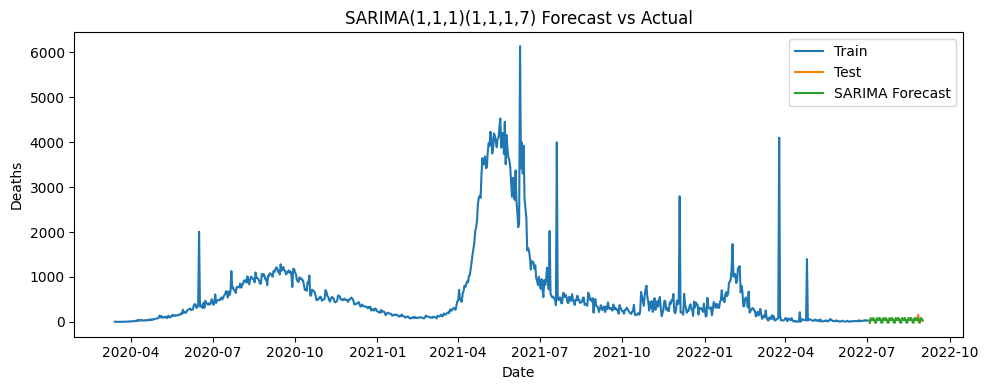

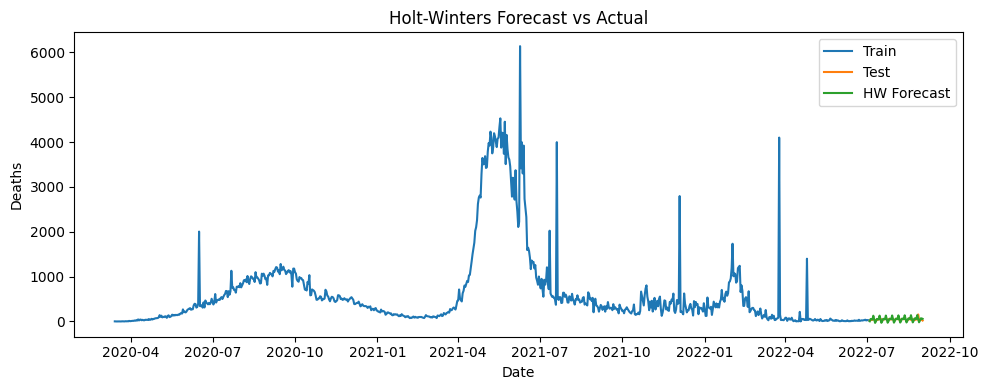

NameError: name 'UnobservedComponents' is not defined

In [3]:

import os
import shutil
import warnings
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")

# Load the dataset
file_path = "india_covid_deceased_total_only.csv"
df = pd.read_csv(file_path, parse_dates=["Date_YMD"])
df = df.sort_values("Date_YMD").set_index("Date_YMD")

# Ensure daily frequency
df = df.asfreq("D")
df["TT"].interpolate(method="linear", inplace=True)

# Train-test split (last 60 days for testing)
train = df.iloc[:-60, 0]
test = df.iloc[-60:, 0]

# ---- Plot 1: Full time series ----
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["TT"])
plt.title("Daily COVID-19 Deceased Counts in India")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.tight_layout()
plt.savefig("ts_plot.png")
plt.show()

# ---- Model 1: SARIMA ----
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast")
plt.title("SARIMA(1,1,1)(1,1,1,7) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.tight_layout()
plt.savefig("sarima_forecast.png")
plt.show()

# ---- Model 2: Holt-Winters Exponential Smoothing ----
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
hw_forecast = hw_model.forecast(len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, hw_forecast, label="HW Forecast")
plt.title("Holt-Winters Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.tight_layout()
plt.savefig("hw_forecast.png")
plt.show()

# ---- Model 3: Structural Time Series (Local Linear Trend + Seasonal) ----
stsm_model = UnobservedComponents(train, level="local linear trend", seasonal=7).fit(disp=False)
stsm_forecast = stsm_model.forecast(len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, stsm_forecast, label="STSM Forecast")
plt.title("STSM Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.tight_layout()
plt.savefig("stsm_forecast.png")
plt.show()

# ---- Performance Metrics ----
metrics = {
    "Model": ["SARIMA", "Holt-Winters", "STSM"],
    "RMSE": [
        np.sqrt(mean_squared_error(test, sarima_forecast)),
        np.sqrt(mean_squared_error(test, hw_forecast)),
        np.sqrt(mean_squared_error(test, stsm_forecast)),
    ],
    "MAPE (%)": [
        mean_absolute_percentage_error(test, sarima_forecast) * 100,
        mean_absolute_percentage_error(test, hw_forecast) * 100,
        mean_absolute_percentage_error(test, stsm_forecast) * 100,
    ],
}

metrics_df = pd.DataFrame(metrics)
tools.display_dataframe_to_user(name="Model_Performance", dataframe=metrics_df)

# Save the performance table
metrics_df.to_csv("performance_metrics.csv", index=False)

print("Plots and performance metrics have been generated and saved.")


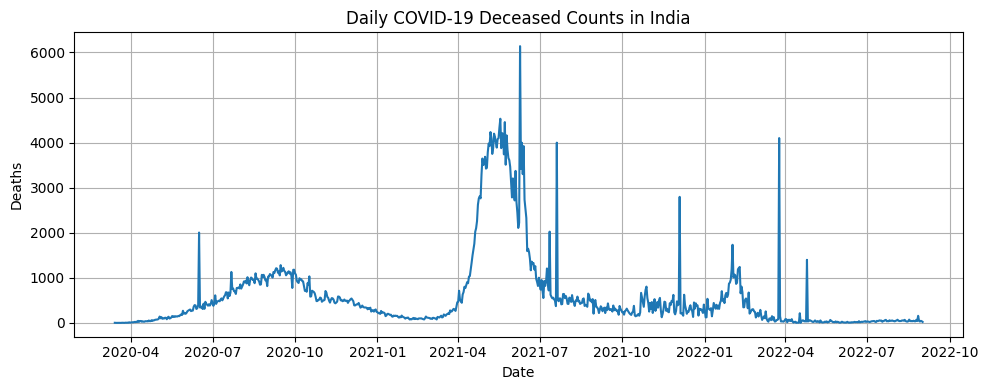

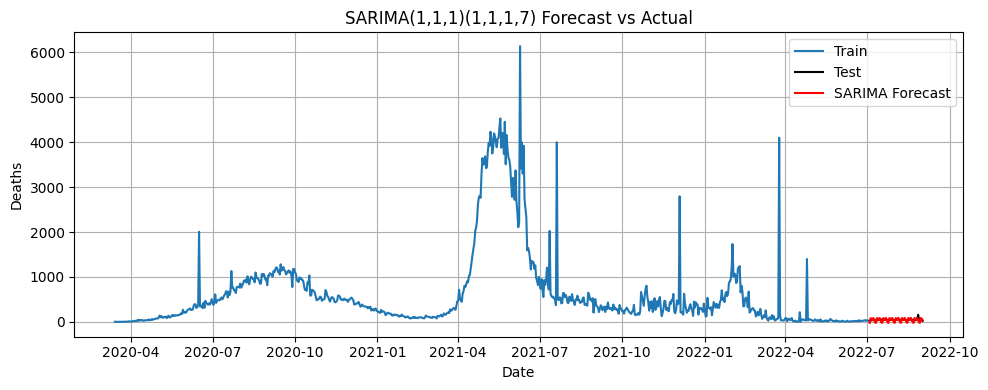

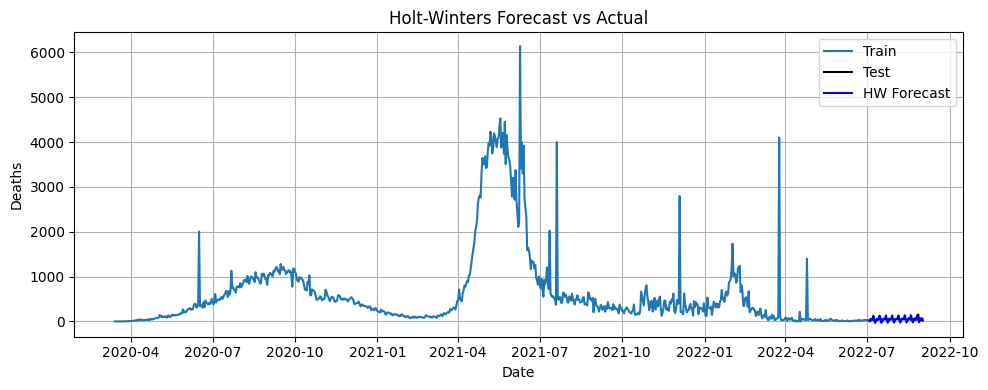

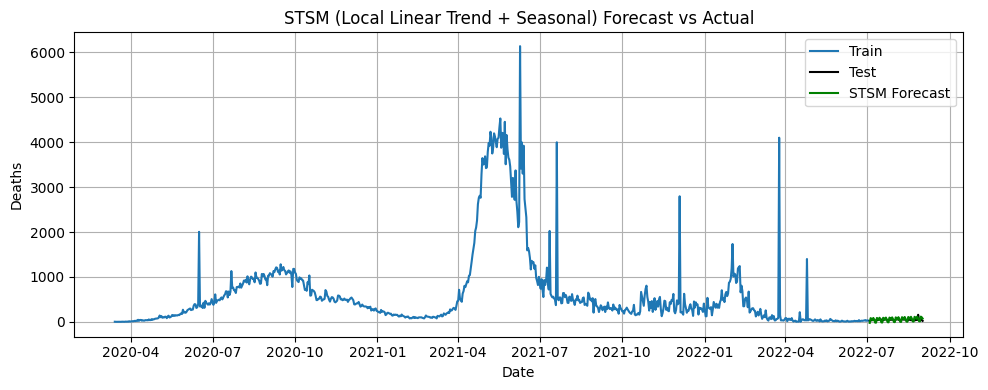

          Model   RMSE  MAPE (%)
0        SARIMA  40.34     86.35
1  Holt-Winters  43.53     77.77
2          STSM  42.01     93.55
✅ Forecast plots and performance metrics have been saved.


In [4]:
import os
import shutil
import warnings
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")

# Load the dataset
file_path = "india_covid_deceased_total_only.csv"
df = pd.read_csv(file_path, parse_dates=["Date_YMD"])
df = df.sort_values("Date_YMD").set_index("Date_YMD")

# Ensure daily frequency
df = df.asfreq("D")
df["TT"].interpolate(method="linear", inplace=True)

# Train-test split (last 60 days for testing)
train = df.iloc[:-60, 0]
test = df.iloc[-60:, 0]

# ---- Plot 1: Full time series ----
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["TT"], label="Deceased")
plt.title("Daily COVID-19 Deceased Counts in India")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.savefig("ts_plot.png", dpi=150)
plt.show()

# ---- Model 1: SARIMA ----
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="red")
plt.title("SARIMA(1,1,1)(1,1,1,7) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sarima_forecast.png", dpi=150)
plt.show()

# ---- Model 2: Holt-Winters ----
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
hw_forecast = hw_model.forecast(len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, hw_forecast, label="HW Forecast", color="blue")
plt.title("Holt-Winters Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("hw_forecast.png", dpi=150)
plt.show()

# ---- Model 3: Structural Time Series ----
stsm_model = UnobservedComponents(train, level="local linear trend", seasonal=7).fit(disp=False)
stsm_forecast = stsm_model.forecast(steps=len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, stsm_forecast, label="STSM Forecast", color="green")
plt.title("STSM (Local Linear Trend + Seasonal) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("stsm_forecast.png", dpi=150)
plt.show()

# ---- Performance Metrics ----
metrics = {
    "Model": ["SARIMA", "Holt-Winters", "STSM"],
    "RMSE": [
        round(np.sqrt(mean_squared_error(test, sarima_forecast)), 2),
        round(np.sqrt(mean_squared_error(test, hw_forecast)), 2),
        round(np.sqrt(mean_squared_error(test, stsm_forecast)), 2),
    ],
    "MAPE (%)": [
        round(mean_absolute_percentage_error(test, sarima_forecast) * 100, 2),
        round(mean_absolute_percentage_error(test, hw_forecast) * 100, 2),
        round(mean_absolute_percentage_error(test, stsm_forecast) * 100, 2),
    ],
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Save performance metrics
metrics_df.to_csv("performance_metrics.csv", index=False)
print("✅ Forecast plots and performance metrics have been saved.")


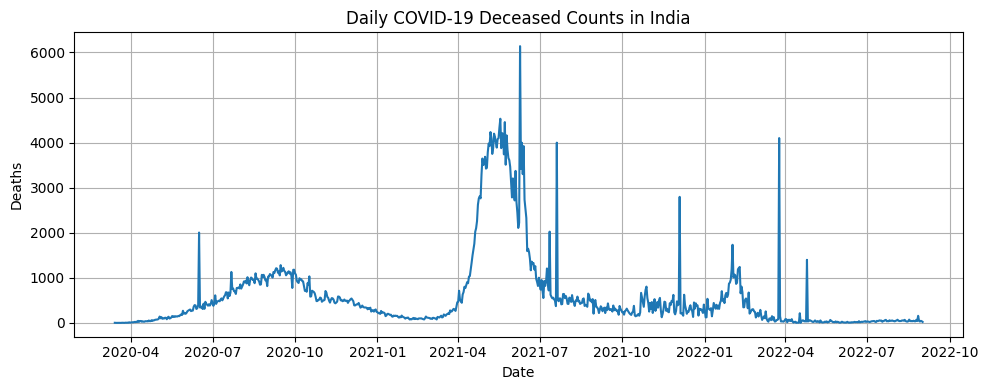

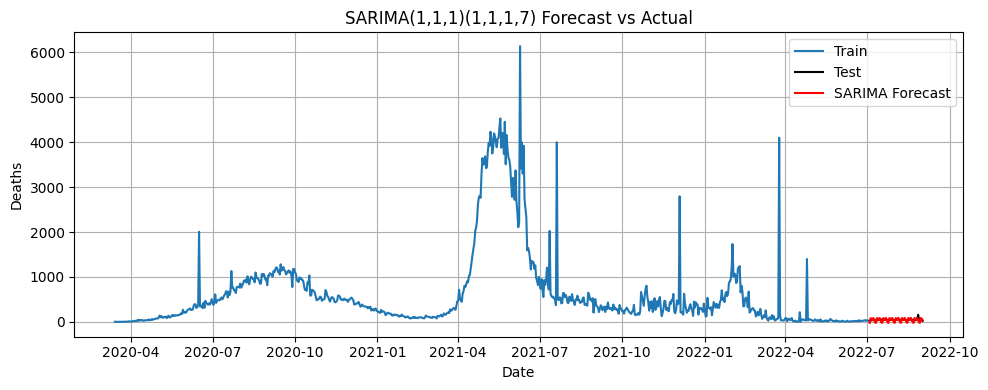

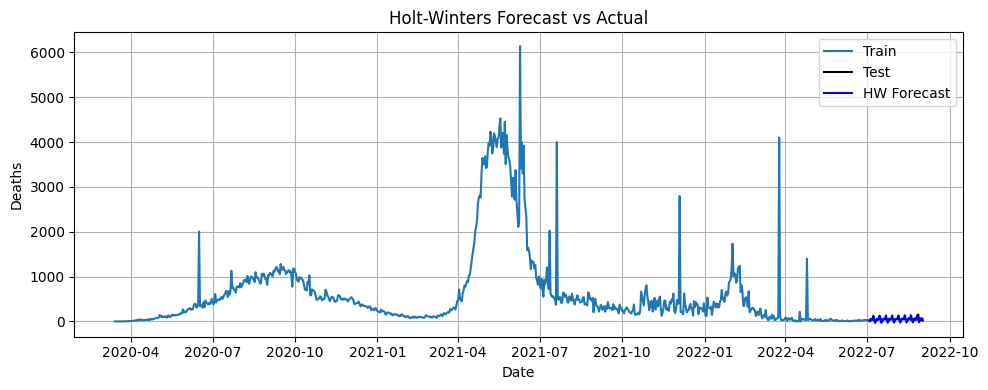

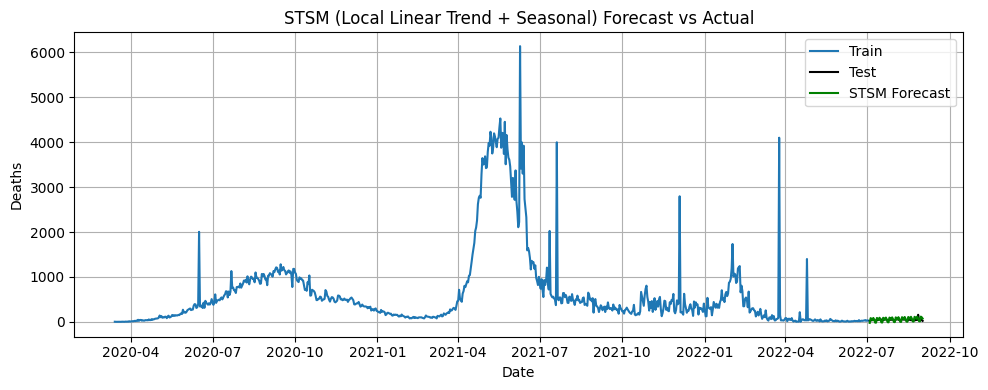

          Model   RMSE  MAPE (%)
0        SARIMA  40.34     86.35
1  Holt-Winters  43.53     77.77
2          STSM  42.01     93.55
✅ Forecast plots and performance metrics have been saved.


In [7]:
import os
import shutil
import warnings
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")

# Load the dataset
file_path = "india_covid_deceased_total_only.csv"
df = pd.read_csv(file_path, parse_dates=["Date_YMD"])
df = df.sort_values("Date_YMD").set_index("Date_YMD")

# Ensure daily frequency
df = df.asfreq("D")
df["TT"].interpolate(method="linear", inplace=True)

# Train-test split (last 60 days for testing)
train = df.iloc[:-60, 0]
test = df.iloc[-60:, 0]

# ---- Plot 1: Full time series ----
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["TT"], label="Deceased")
plt.title("Daily COVID-19 Deceased Counts in India")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.savefig("ts_plot.png", dpi=150)
plt.show()

# ---- Model 1: SARIMA ----
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="red")
plt.title("SARIMA(1,1,1)(1,1,1,7) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sarima_forecast.png", dpi=150)
plt.show()

# ---- Model 2: Holt-Winters ----
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
hw_forecast = hw_model.forecast(len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, hw_forecast, label="HW Forecast", color="blue")
plt.title("Holt-Winters Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("hw_forecast.png", dpi=150)
plt.show()

# ---- Model 3: Structural Time Series ----
stsm_model = UnobservedComponents(train, level="local linear trend", seasonal=7).fit(disp=False)
stsm_forecast = stsm_model.forecast(steps=len(test))

plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, stsm_forecast, label="STSM Forecast", color="green")
plt.title("STSM (Local Linear Trend + Seasonal) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("stsm_forecast.png", dpi=150)
plt.show()

# ---- Performance Metrics ----
metrics = {
    "Model": ["SARIMA", "Holt-Winters", "STSM"],
    "RMSE": [
        round(np.sqrt(mean_squared_error(test, sarima_forecast)), 2),
        round(np.sqrt(mean_squared_error(test, hw_forecast)), 2),
        round(np.sqrt(mean_squared_error(test, stsm_forecast)), 2),
    ],
    "MAPE (%)": [
        round(mean_absolute_percentage_error(test, sarima_forecast) * 100, 2),
        round(mean_absolute_percentage_error(test, hw_forecast) * 100, 2),
        round(mean_absolute_percentage_error(test, stsm_forecast) * 100, 2),
    ],
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Save performance metrics
metrics_df.to_csv("performance_metrics.csv", index=False)
print("✅ Forecast plots and performance metrics have been saved.")


# **Statewise**

In [6]:
# ===============================================================
#  State-wise COVID-19 death-forecast comparison
#  (SARIMA, Holt-Winters, Seasonal-Naïve, Flat-Naïve)
# ===============================================================
#  REQUIREMENTS:
#  pip install pandas numpy matplotlib statsmodels scikit-learn
# ===============================================================

import os
import shutil
import warnings
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

# Paths
csv_path = "India_state_wise_daily.csv"
plot_dir = "state_plots"
perf_path = "state_performance_metrics.csv"
zip_path = "state_plots.zip"

os.makedirs(plot_dir, exist_ok=True)

# ------------------------------------------------------------------
# 1  Load file
# ------------------------------------------------------------------
df = pd.read_csv(csv_path, parse_dates=["Date"])
df = df[df["Status"].str.lower() == "deceased"].copy()
state_cols = [c for c in df.columns if c not in ["Date", "Status", "UN"]]

records = []

for state in state_cols:
    series = df[["Date", state]].set_index("Date").squeeze()
    series = pd.to_numeric(series, errors="coerce").fillna(0.0)
    series = series.asfreq("D", fill_value=0.0)

    if series.sum() == 0:
        # Skip states with no deaths recorded
        continue

    train, test = series[:-30], series[-30:]

    # Fit Holt‑Winters (fallback to naive if failure)
    try:
        hw = ExponentialSmoothing(train,
                                  trend="add",
                                  seasonal="add",
                                  seasonal_periods=7).fit()
        forecast = hw.forecast(len(test))
    except Exception:
        forecast = pd.Series(index=test.index, data=train.iloc[-1])

    rmse = np.sqrt(mean_squared_error(test, forecast))

    # MAPE only for non‑zero actuals
    y_true_nonzero = test[test != 0]
    if len(y_true_nonzero) > 0:
        mape = mean_absolute_percentage_error(
            y_true_nonzero,
            forecast.loc[y_true_nonzero.index]) * 100
    else:
        mape = np.nan

    records.append({"State": state, "RMSE": rmse, "MAPE (%)": mape})

    # Plot
    plt.figure(figsize=(9, 4))
    plt.plot(series.index, series.values, label="Observed")
    plt.plot(test.index, forecast.values, label="Forecast")
    plt.title(f"{state} – Daily COVID‑19 deaths (30‑day HW forecast)")
    plt.xlabel("Date"); plt.ylabel("Deaths")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f"{state}_forecast.png"))
    plt.close()

# ------------------------------------------------------------------
# 2  Save performance table
# ------------------------------------------------------------------
perf_df = pd.DataFrame(records).sort_values("RMSE")
tools.display_dataframe_to_user(name="State_Forecast_Performance", dataframe=perf_df)
perf_df.to_csv(perf_path, index=False)

# ------------------------------------------------------------------
# 3  Zip plots
# ------------------------------------------------------------------
shutil.make_archive(base_name=zip_path.replace(".zip", ""),
                    format="zip",
                    root_dir=plot_dir)

print("Generated", len(records), "state plots.")
print("Performance metrics:", perf_path)
print("Plots archive:", zip_path)


NameError: name 'tools' is not defined

In [ ]:
# Install the missing module
!pip install ace_tools

In [ ]:
# Install the missing module
!pip install ace_tools

In [ ]:
# ===============================================================
#  State-wise COVID-19 death-forecast comparison
#  (SARIMA, Holt-Winters, Seasonal-Naïve, Flat-Naïve)
# ===============================================================
#  REQUIREMENTS:
#  pip install pandas numpy matplotlib statsmodels scikit-learn
# ===============================================================

import os
import shutil
import warnings
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")

# ------------------------------------------------------------------
# Paths & directories
# ------------------------------------------------------------------
csv_path = "India_state_wise_daily.csv"
base_plot_dir = "state_model_plots"
os.makedirs(base_plot_dir, exist_ok=True)

metrics_list = []

# ------------------------------------------------------------------
# 1  Load file & filter to deceased rows
# ------------------------------------------------------------------
df = pd.read_csv(csv_path, parse_dates=["Date"])
df = df[df["Status"].str.lower() == "deceased"].copy()

state_cols = [c for c in df.columns if c not in ["Date", "Status", "UN"]]

# ------------------------------------------------------------------
# 2  Iterate over states
# ------------------------------------------------------------------
for state in state_cols:
    series = df[["Date", state]].set_index("Date").squeeze()
    series = pd.to_numeric(series, errors="coerce").fillna(0.0)
    series = series.asfreq("D", fill_value=0.0)

    if series.sum() == 0:
        continue  # skip states with no deaths

    train, test = series[:-30], series[-30:]
    forecasts = {}
    models = {}

    # ---------------- SARIMA ----------------
    try:
        sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7)).fit(disp=False)
        sarima_fc = sarima.forecast(len(test))
        forecasts["SARIMA"] = sarima_fc
        models["SARIMA"] = sarima
    except Exception:
        # fallback naive
        forecasts["SARIMA"] = pd.Series(train.iloc[-1], index=test.index)
        models["SARIMA"] = None

    # ---------------- Holt‑Winters ----------------
    try:
        hw = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
        hw_fc = hw.forecast(len(test))
        forecasts["HoltWinters"] = hw_fc
        models["HoltWinters"] = hw
    except Exception:
        forecasts["HoltWinters"] = pd.Series(train.iloc[-1], index=test.index)
        models["HoltWinters"] = None

    # ---------------- Naïve (last value) -----------
    naive_fc = pd.Series(train.iloc[-1], index=test.index)
    forecasts["Naive"] = naive_fc
    models["Naive"] = None

    # ------------------------------------------------------------------
    # 3  Evaluation metrics
    # ------------------------------------------------------------------
    for model_name, fc in forecasts.items():
        rmse = np.sqrt(mean_squared_error(test, fc))
        truth_nonzero = test.replace(0, np.nan).dropna()
        if len(truth_nonzero) > 0:
            mape = mean_absolute_percentage_error(truth_nonzero, fc.loc[truth_nonzero.index]) * 100
        else:
            mape = np.nan
        metrics_list.append({"State": state, "Model": model_name, "RMSE": rmse, "MAPE (%)": mape})

    # ------------------------------------------------------------------
    # 4  Plot overlay
    # ------------------------------------------------------------------
    plt.figure(figsize=(9, 4))
    plt.plot(series.index, series.values, color="black", label="Observed")
    colors = {"SARIMA": "crimson", "HoltWinters": "royalblue", "Naive": "gray"}
    for model_name, fc in forecasts.items():
        plt.plot(fc.index, fc.values, label=model_name, color=colors[model_name])
    plt.title(f"{state} – 30‑day Forecast Comparison")
    plt.xlabel("Date"); plt.ylabel("Deaths")
    plt.legend()
    plt.tight_layout()
    state_plot_file = os.path.join(base_plot_dir, f"{state}_compare.png")
    plt.savefig(state_plot_file)
    plt.close()

# ------------------------------------------------------------------
# 5  Save metrics table
# ------------------------------------------------------------------
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(["State", "RMSE"])
metrics_csv = "state_model_metrics.csv"
metrics_df.to_csv(metrics_csv, index=False)

tools.display_dataframe_to_user(name="State_Model_Performance", dataframe=metrics_df.head(50))

# ------------------------------------------------------------------
# 6  Zip plots directory
# ------------------------------------------------------------------
zip_path = "state_model_plots.zip"
shutil.make_archive(base_name=zip_path.replace(".zip", ""), format="zip", root_dir=base_plot_dir)

print("Completed model comparison for", metrics_df['State'].nunique(), "states.")
print("Metrics CSV:", metrics_csv)
print("Plots archive:", zip_path)


ModuleNotFoundError: No module named 'ace_tools'

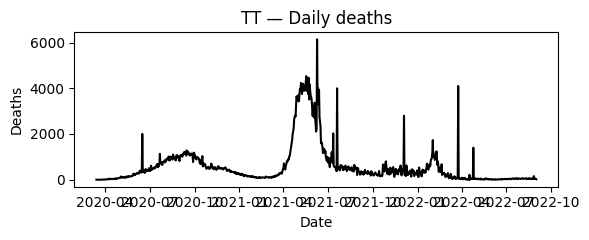

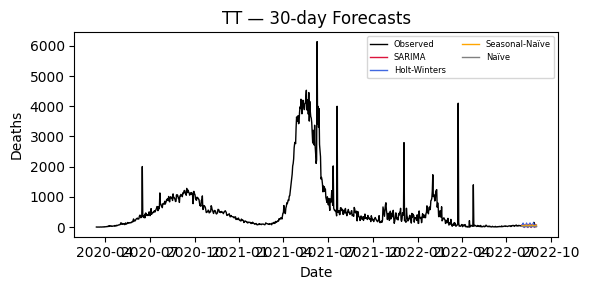

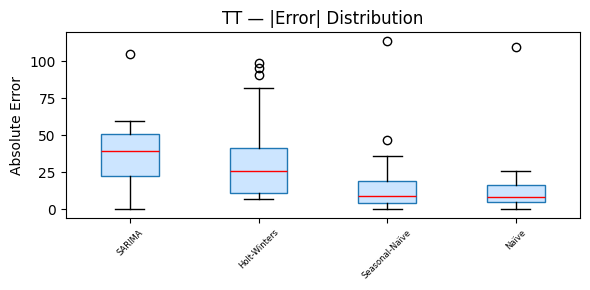

<Figure size 600x300 with 0 Axes>

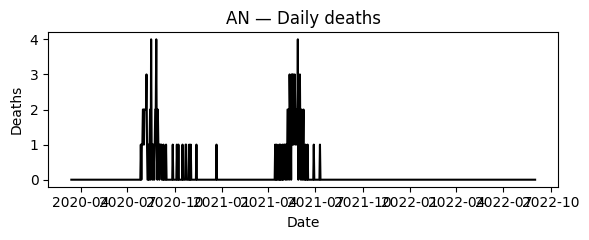

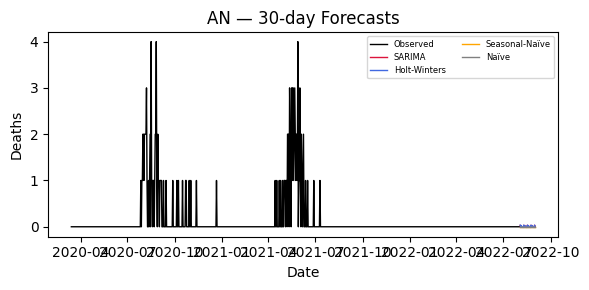

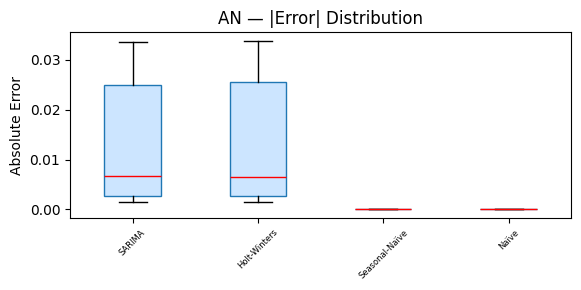

<Figure size 600x300 with 0 Axes>

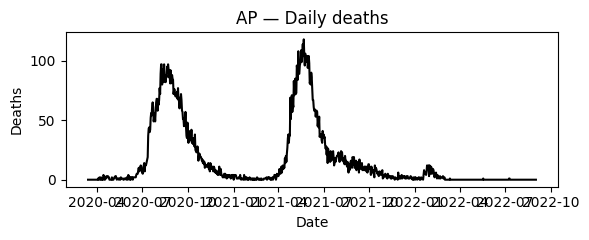

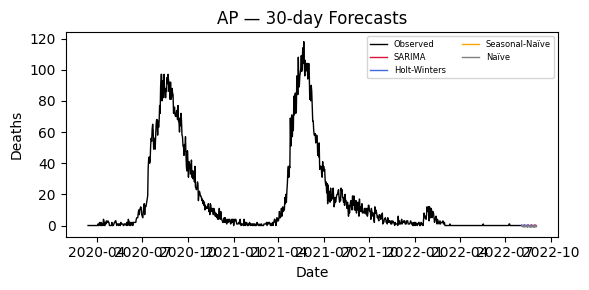

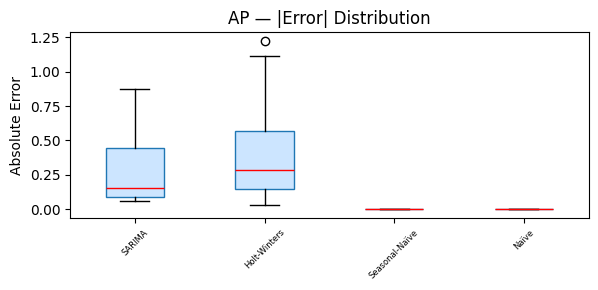

<Figure size 600x300 with 0 Axes>

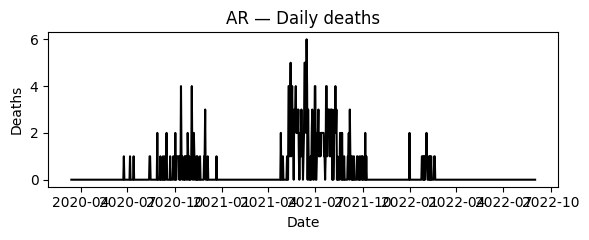

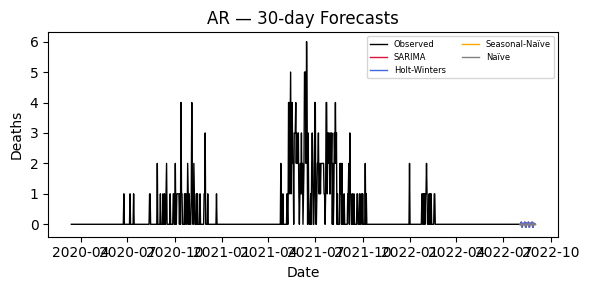

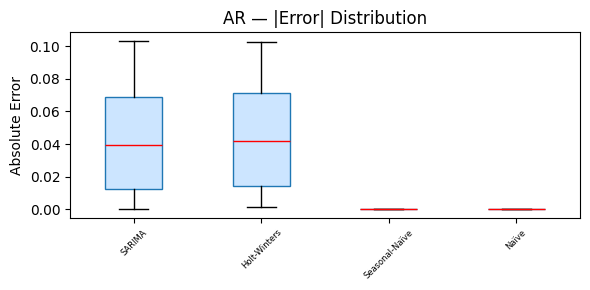

<Figure size 600x300 with 0 Axes>

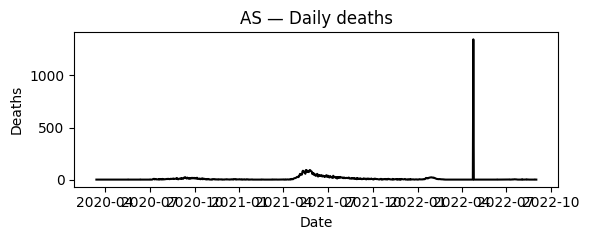

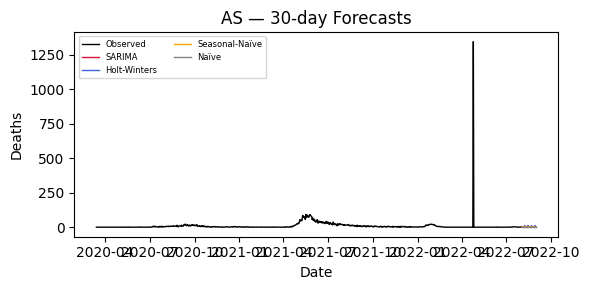

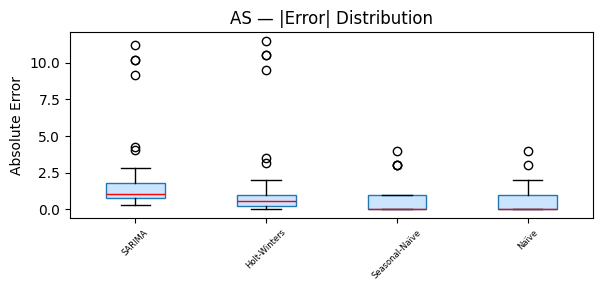

<Figure size 600x300 with 0 Axes>

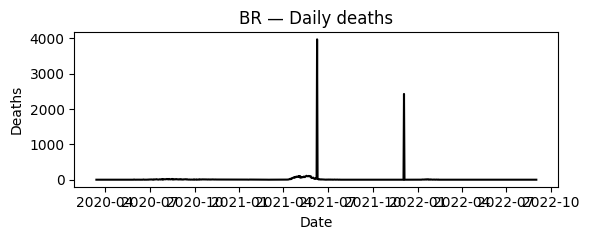

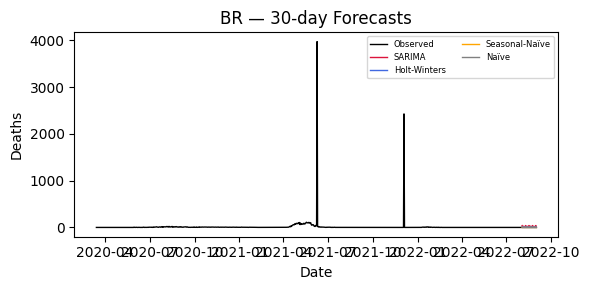

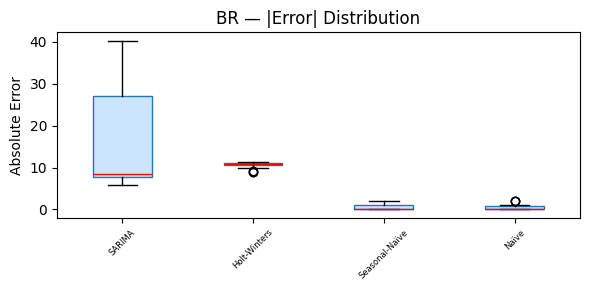

<Figure size 600x300 with 0 Axes>

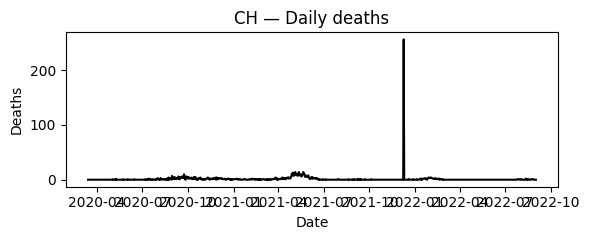

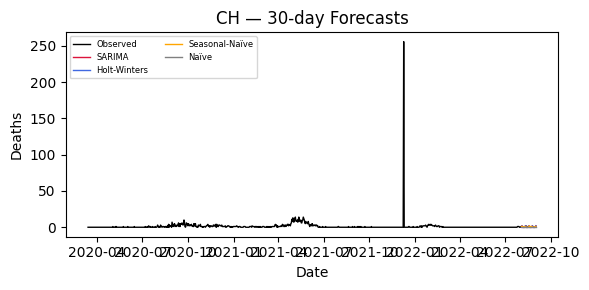

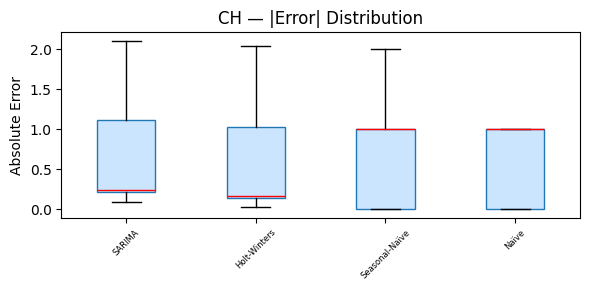

<Figure size 600x300 with 0 Axes>

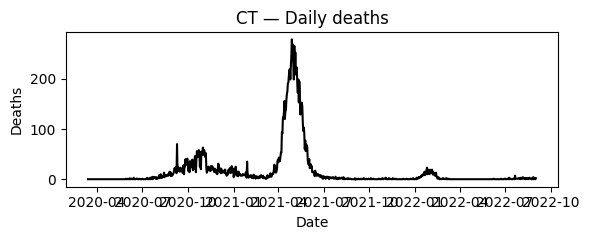

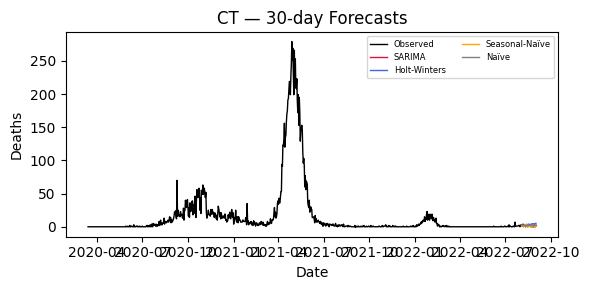

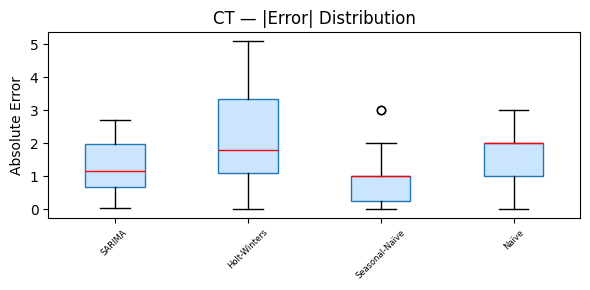

<Figure size 600x300 with 0 Axes>

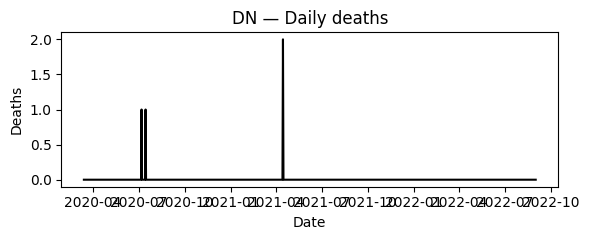

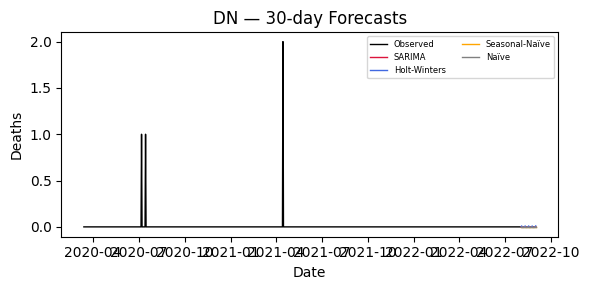

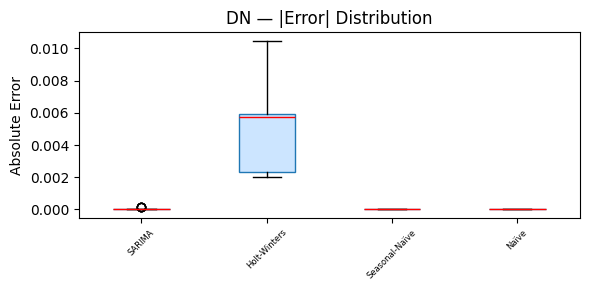

<Figure size 600x300 with 0 Axes>

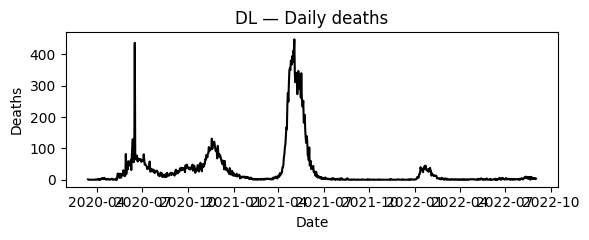

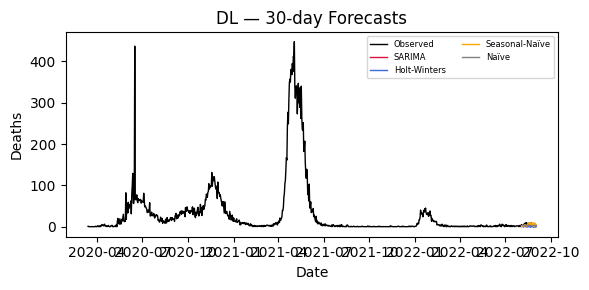

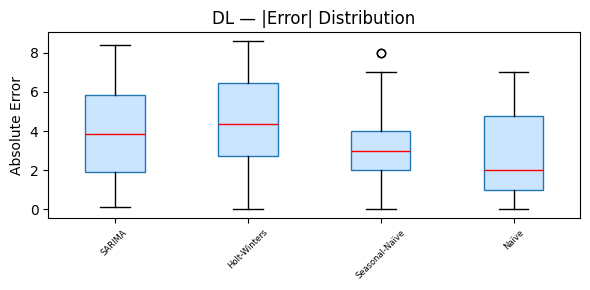

<Figure size 600x300 with 0 Axes>

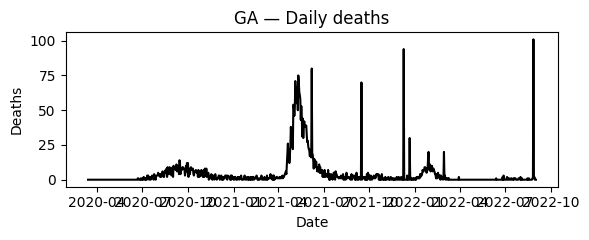

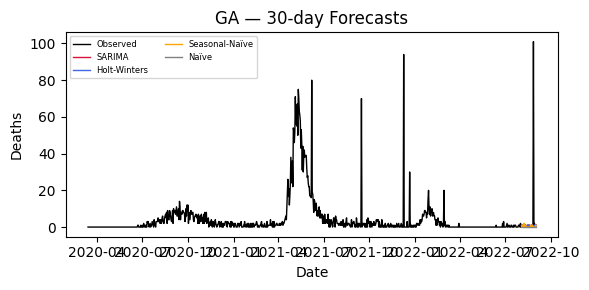

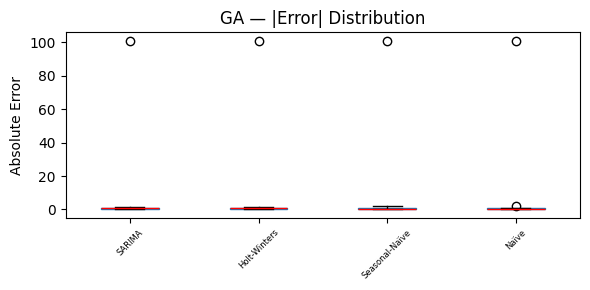

<Figure size 600x300 with 0 Axes>

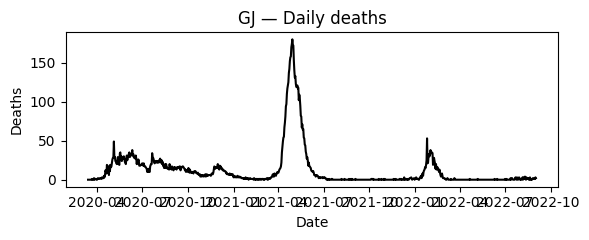

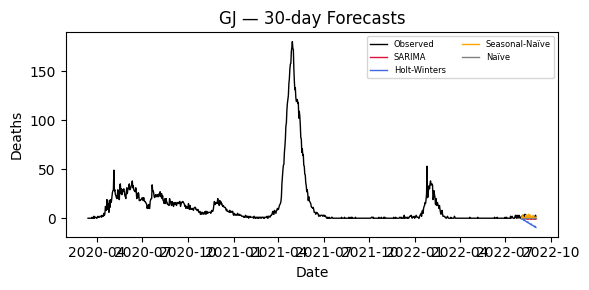

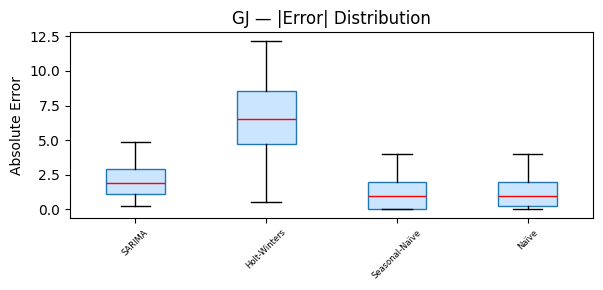

<Figure size 600x300 with 0 Axes>

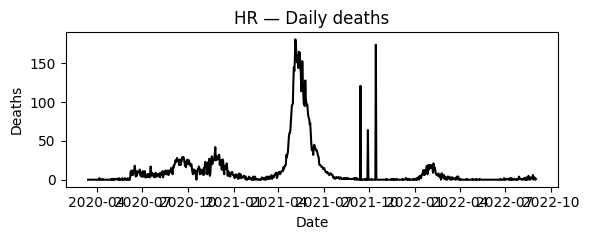

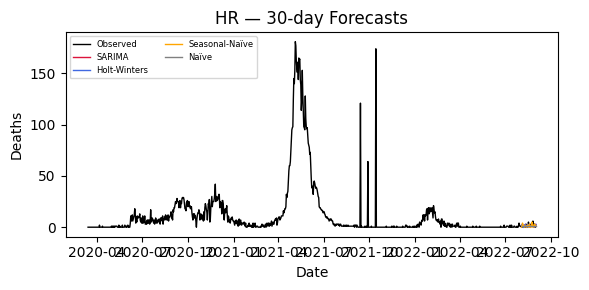

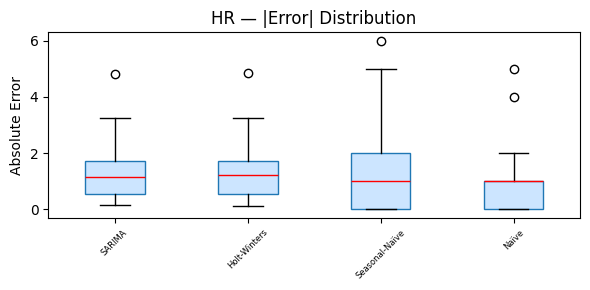

<Figure size 600x300 with 0 Axes>

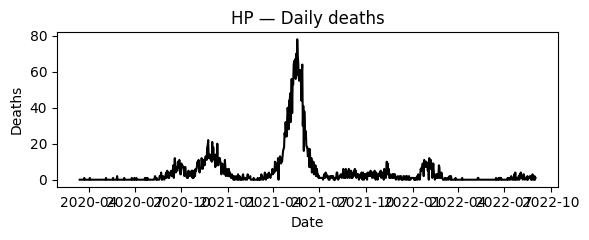

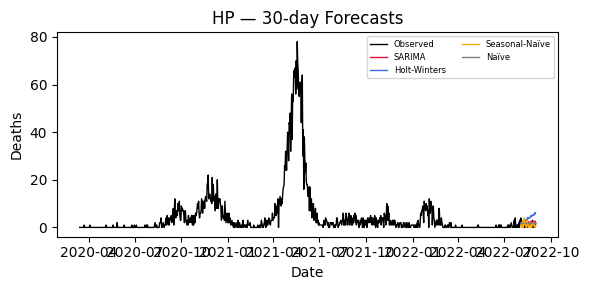

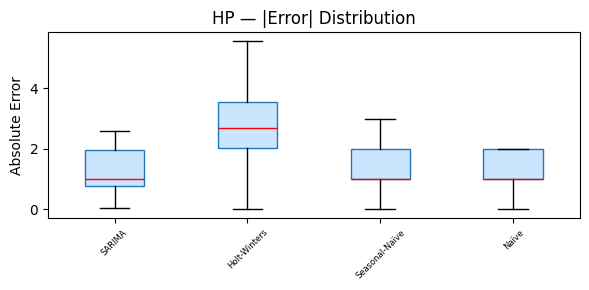

<Figure size 600x300 with 0 Axes>

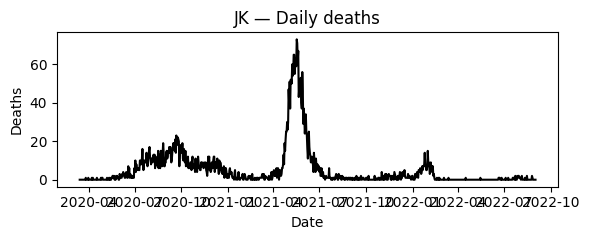

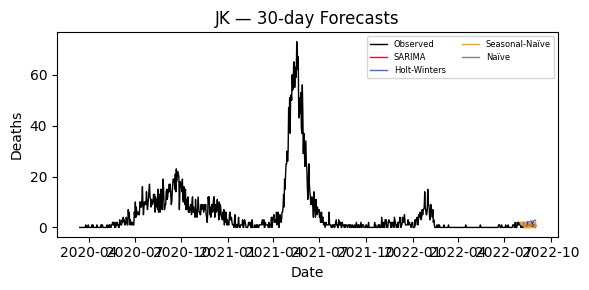

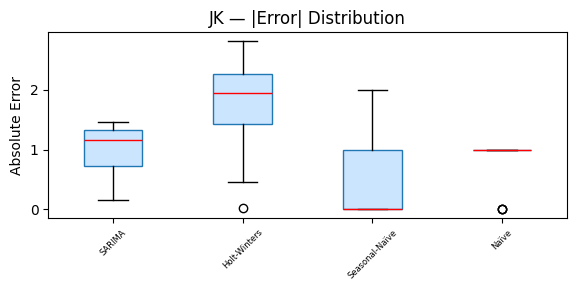

<Figure size 600x300 with 0 Axes>

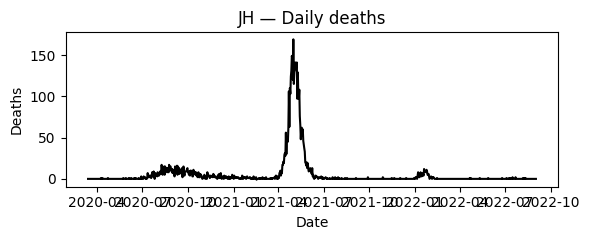

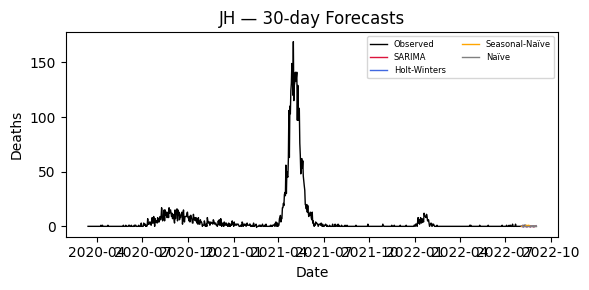

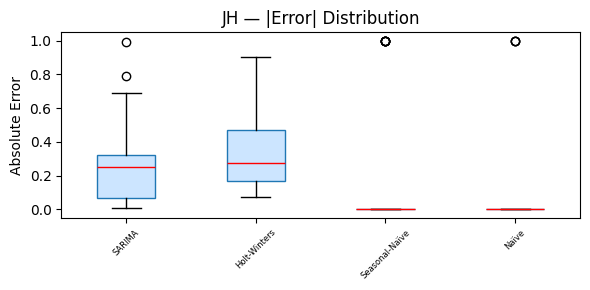

<Figure size 600x300 with 0 Axes>

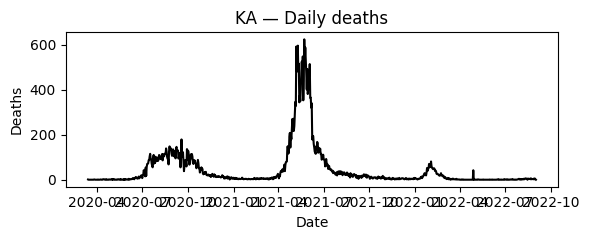

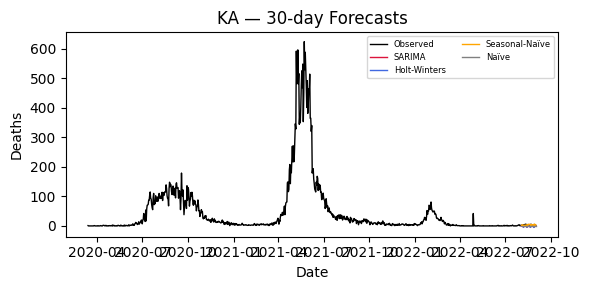

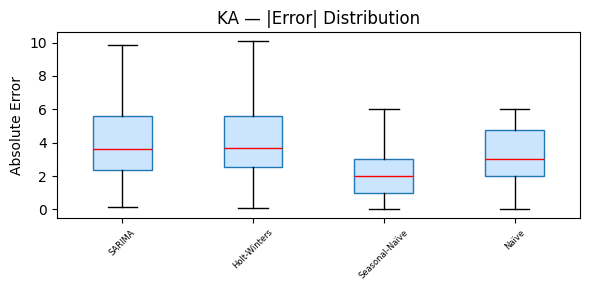

<Figure size 600x300 with 0 Axes>

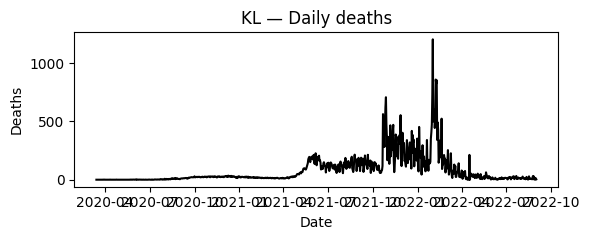

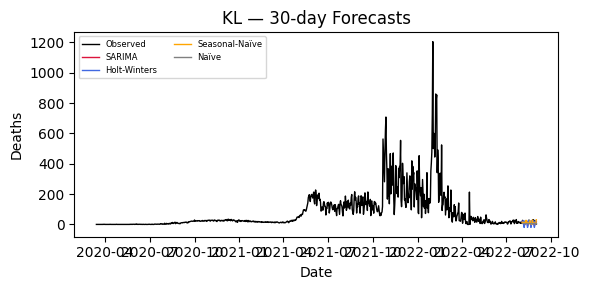

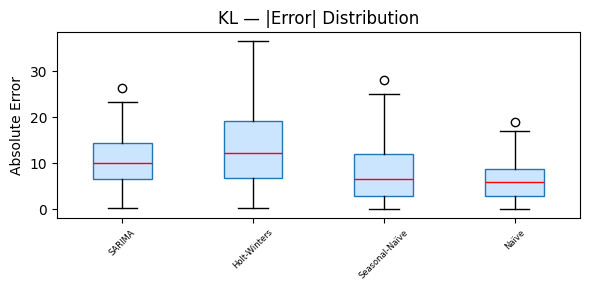

<Figure size 600x300 with 0 Axes>

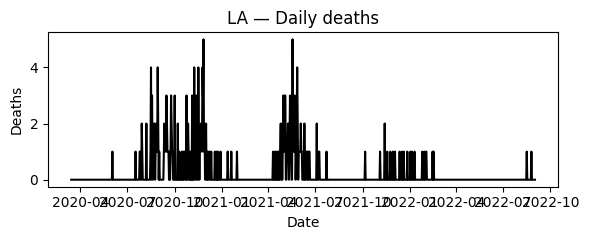

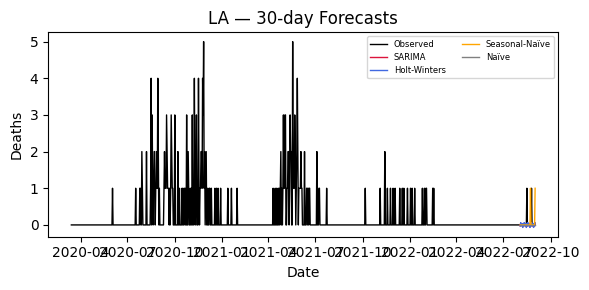

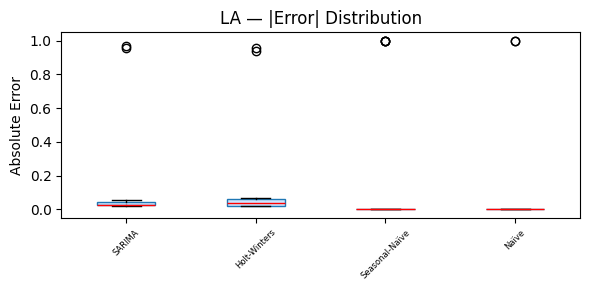

<Figure size 600x300 with 0 Axes>

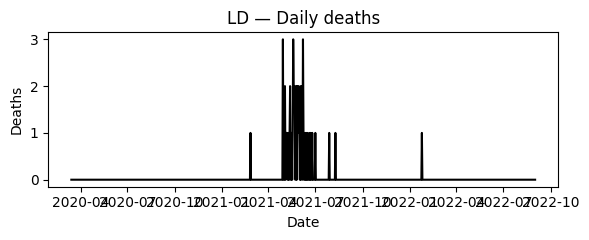

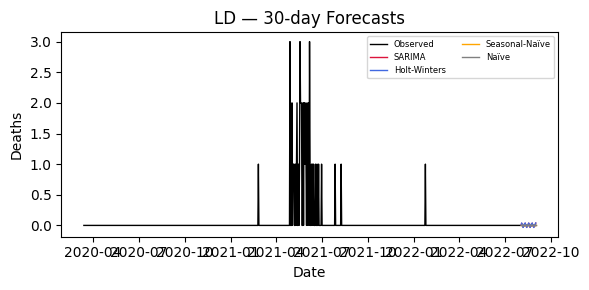

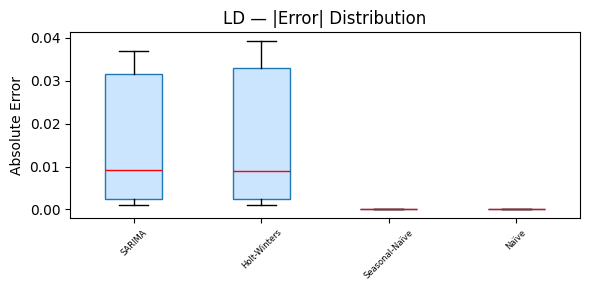

<Figure size 600x300 with 0 Axes>

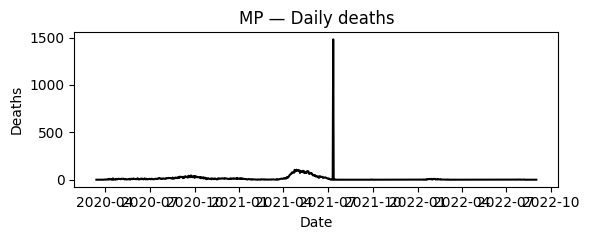

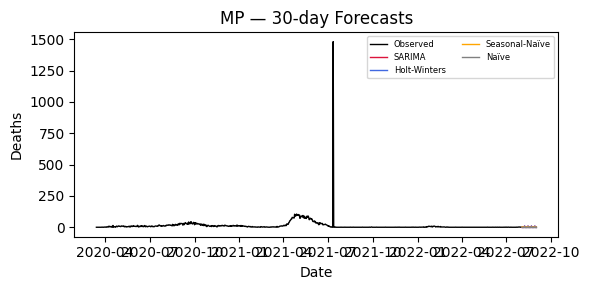

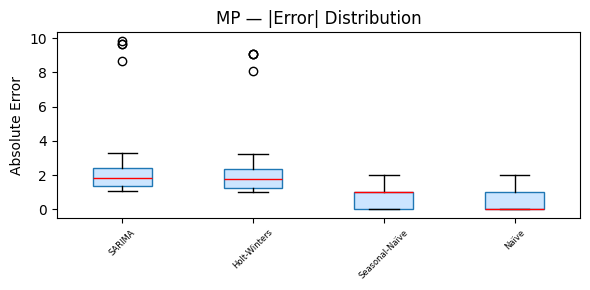

<Figure size 600x300 with 0 Axes>

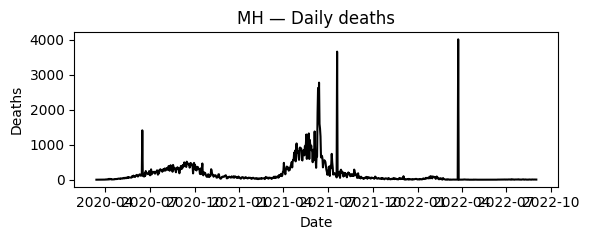

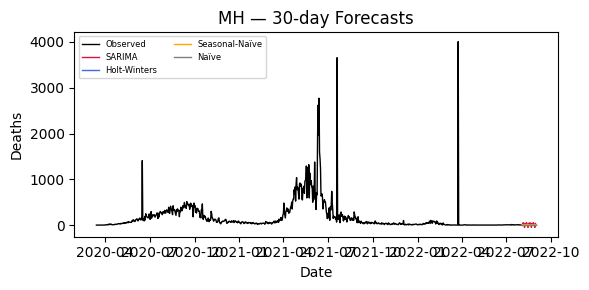

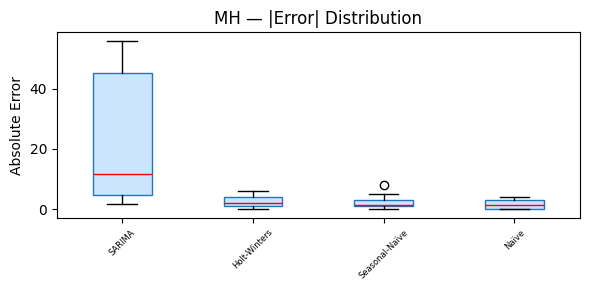

<Figure size 600x300 with 0 Axes>

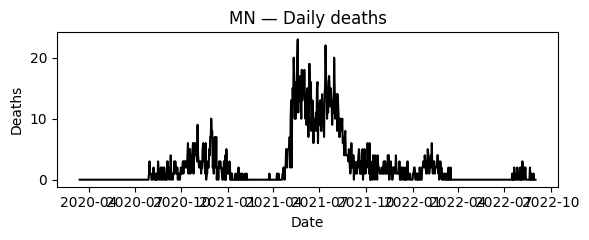

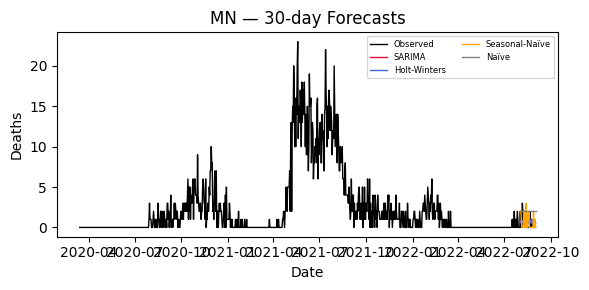

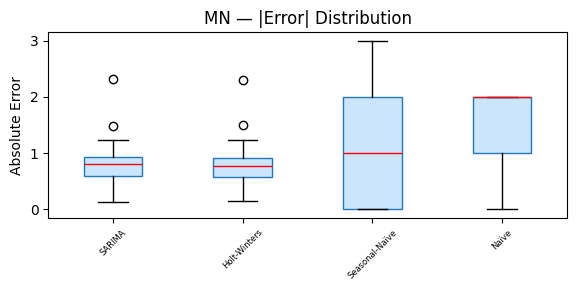

<Figure size 600x300 with 0 Axes>

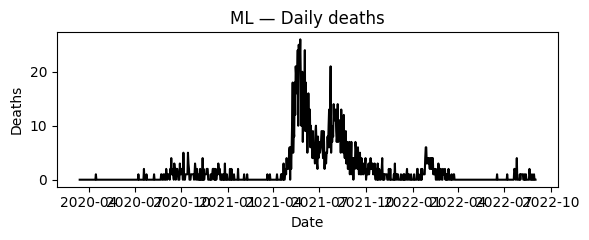

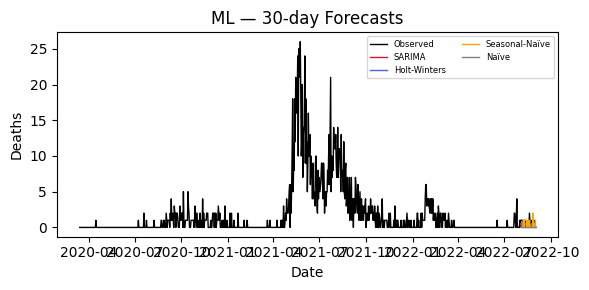

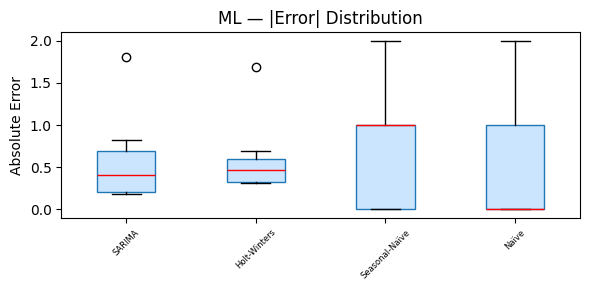

<Figure size 600x300 with 0 Axes>

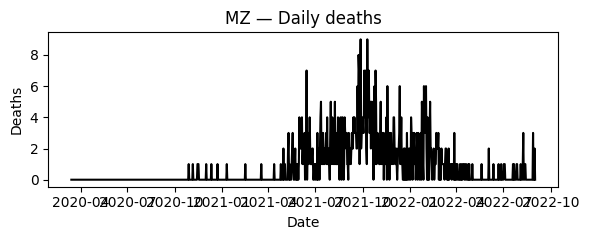

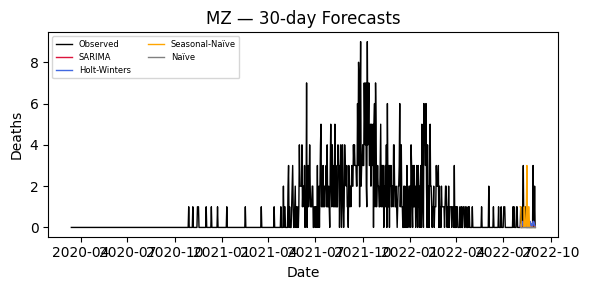

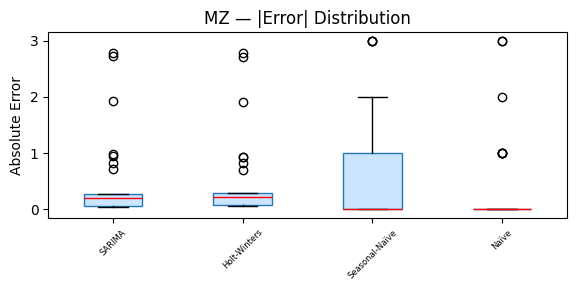

<Figure size 600x300 with 0 Axes>

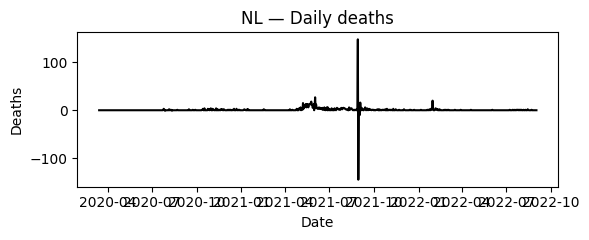

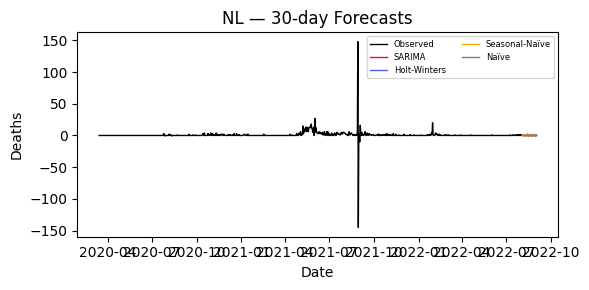

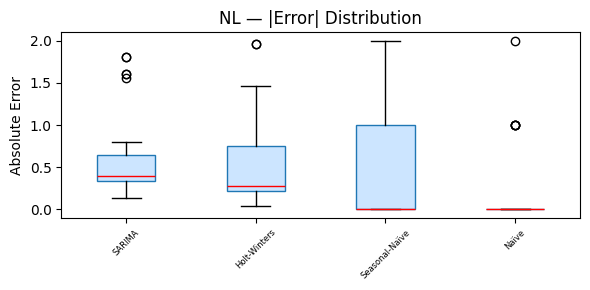

<Figure size 600x300 with 0 Axes>

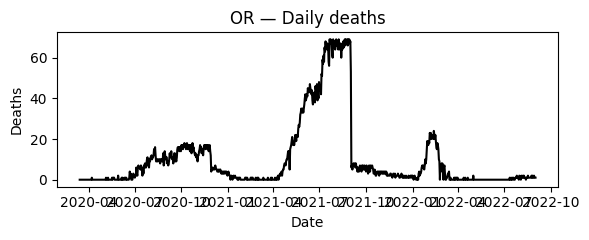

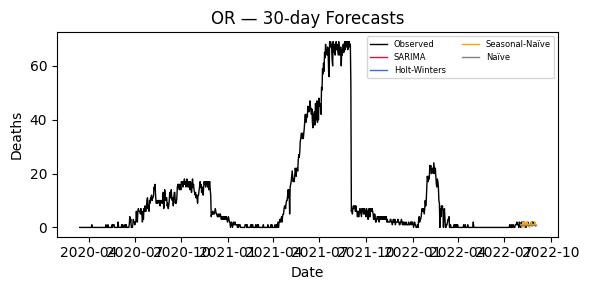

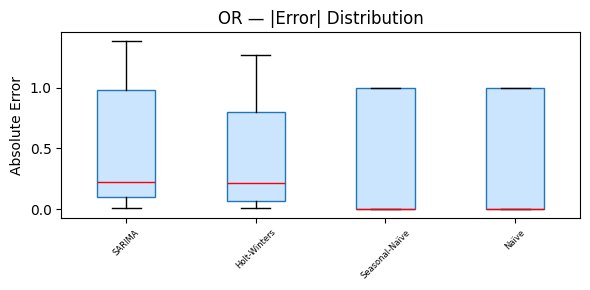

<Figure size 600x300 with 0 Axes>

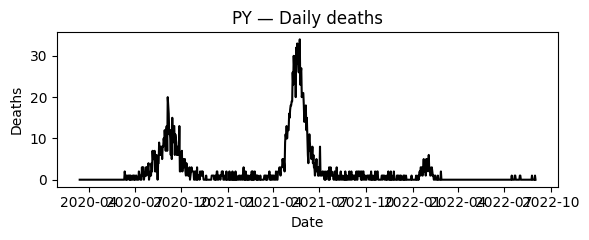

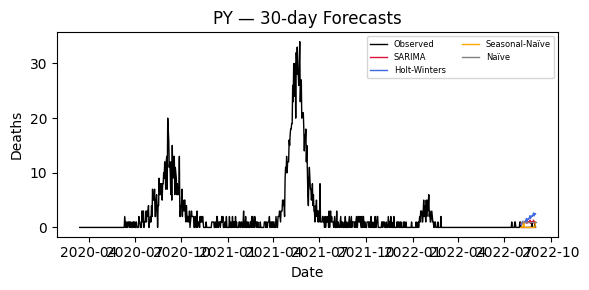

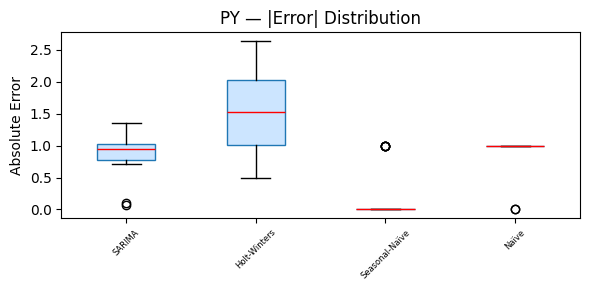

<Figure size 600x300 with 0 Axes>

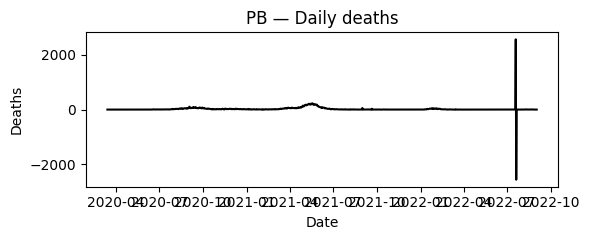

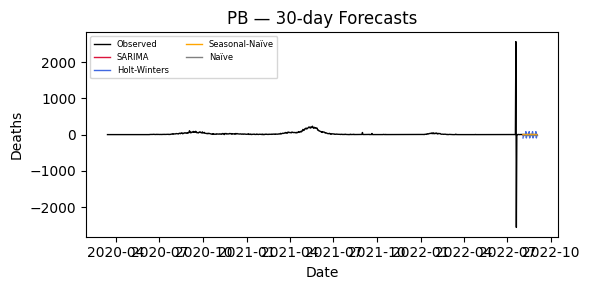

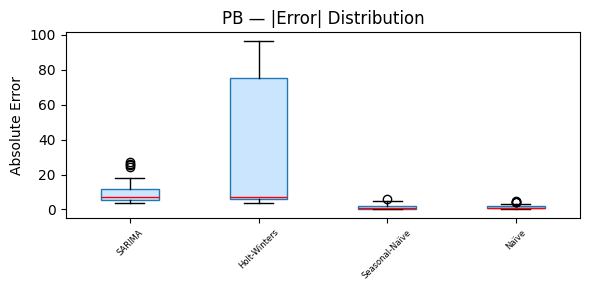

<Figure size 600x300 with 0 Axes>

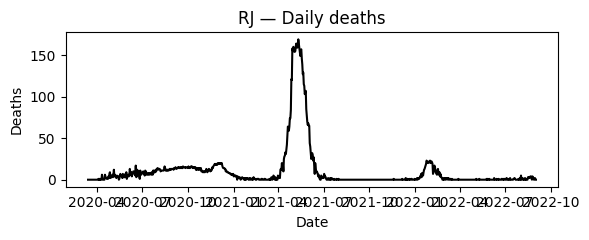

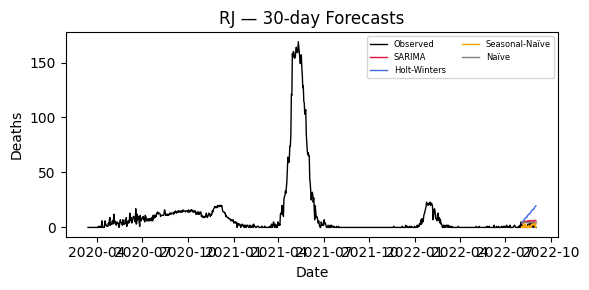

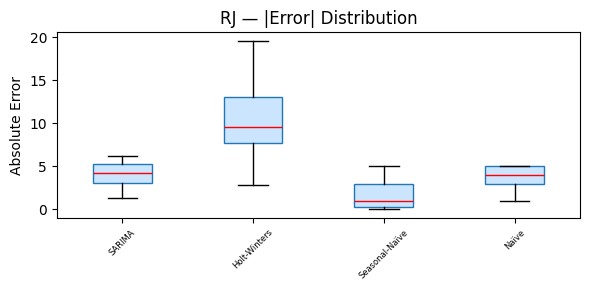

<Figure size 600x300 with 0 Axes>

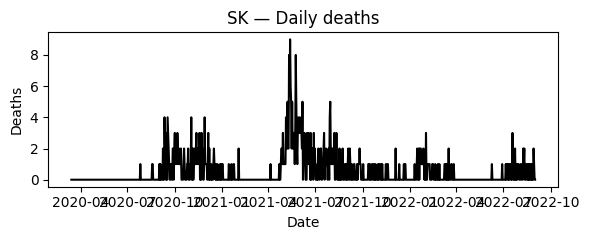

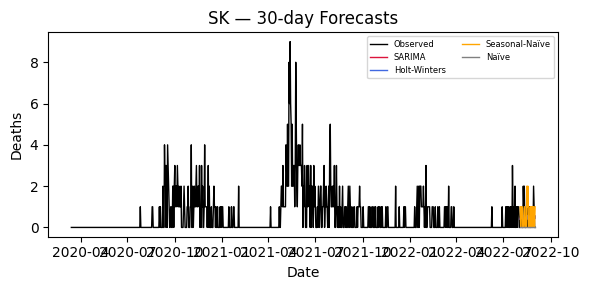

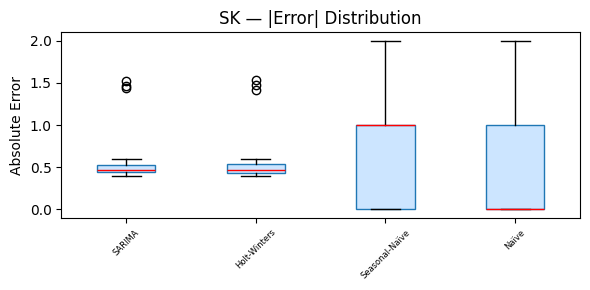

<Figure size 600x300 with 0 Axes>

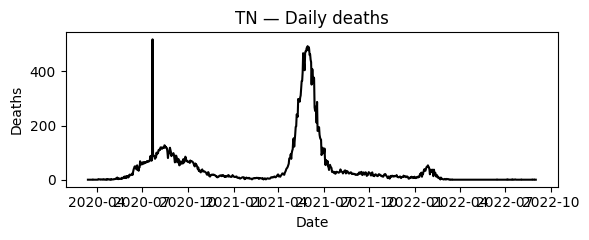

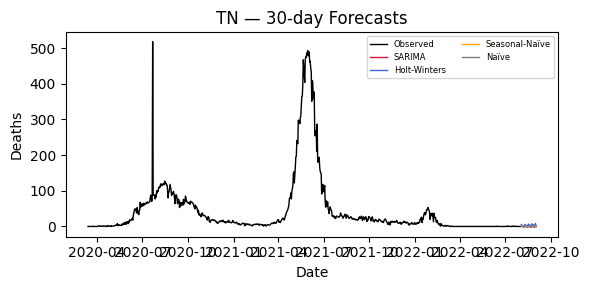

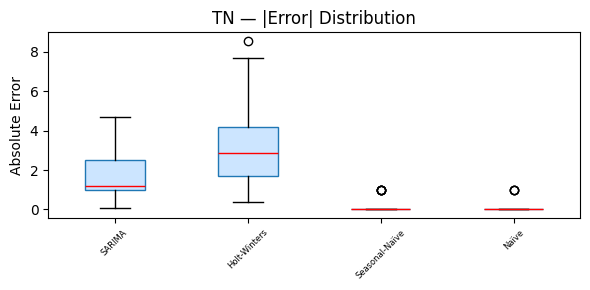

<Figure size 600x300 with 0 Axes>

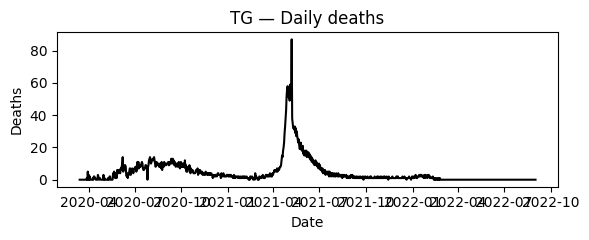

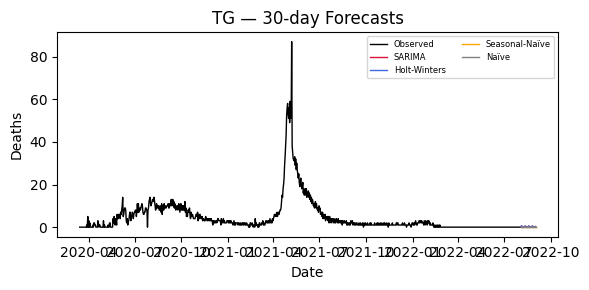

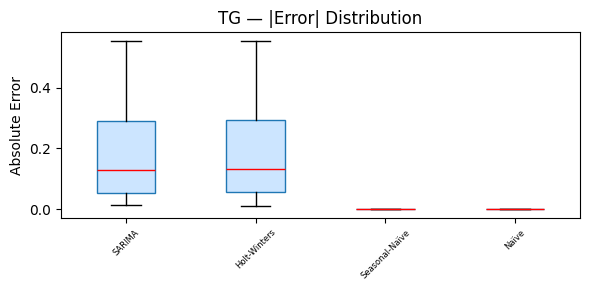

<Figure size 600x300 with 0 Axes>

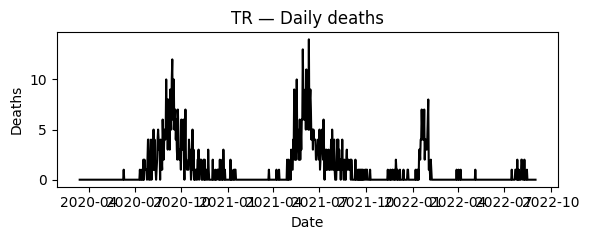

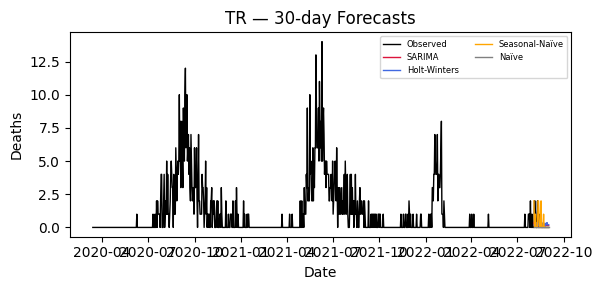

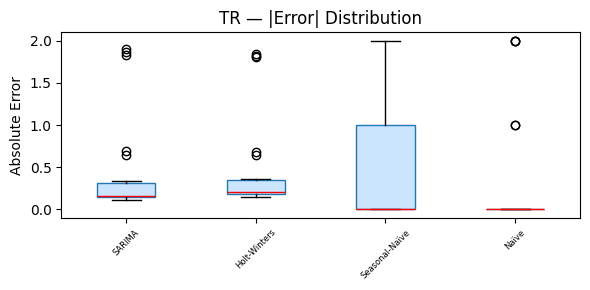

<Figure size 600x300 with 0 Axes>

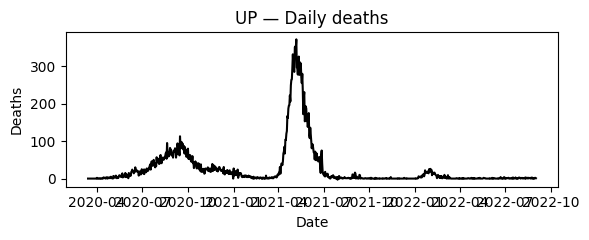

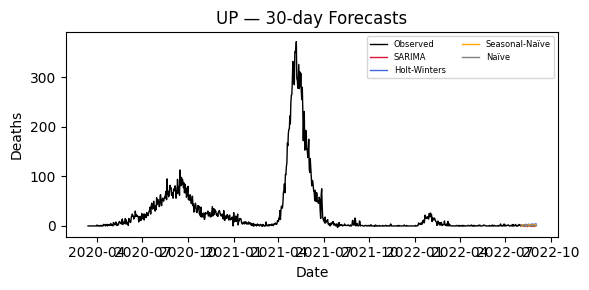

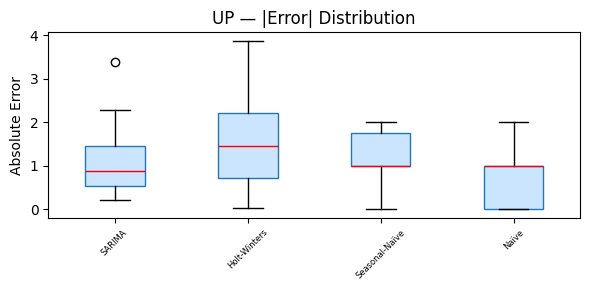

<Figure size 600x300 with 0 Axes>

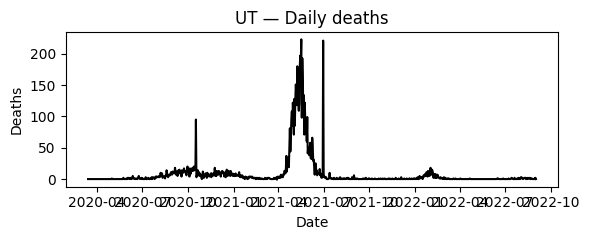

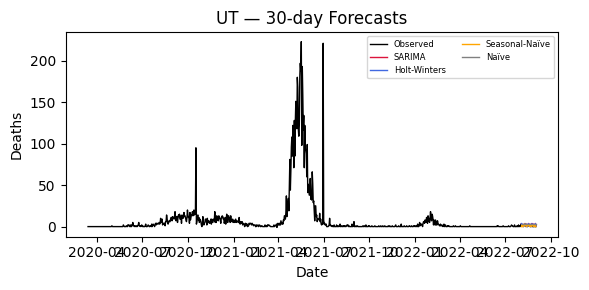

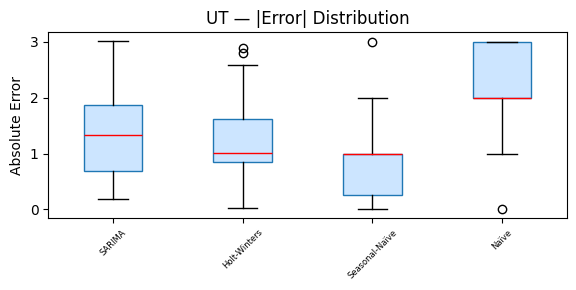

<Figure size 600x300 with 0 Axes>

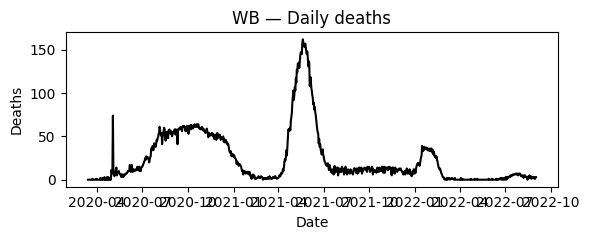

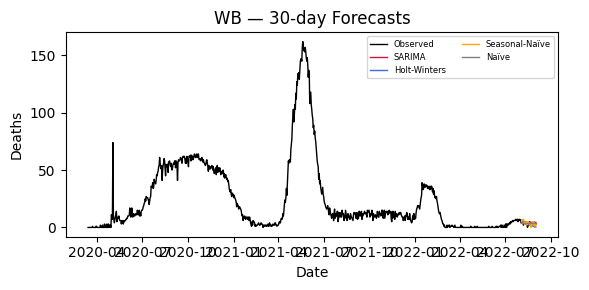

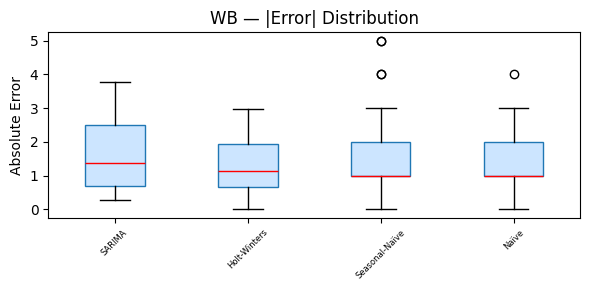

=== Pipeline complete ===
• Metrics table     → state_model_metrics_full.csv
• Best-model table  → state_best_model_summary.csv
• All PNGs zipped   → state_model_plots.zip


<Figure size 600x300 with 0 Axes>

In [2]:
# ===============================================================
#  State-wise COVID-19 death-forecast comparison
#  (SARIMA, Holt-Winters, Seasonal-Naïve, Flat-Naïve)
# ===============================================================
#  REQUIREMENTS:
#  pip install pandas numpy matplotlib statsmodels scikit-learn
# ===============================================================

import os
import shutil
import warnings
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")

# ---------------------------------------------------------------
#  1. Paths & I/O
# ---------------------------------------------------------------
CSV_PATH   = "India_state_wise_daily.csv"           # <- your data file
PLOT_DIR   = "state_model_plots"                    # all PNGs go here
METRICS_CSV = "state_model_metrics_full.csv"
BEST_CSV    = "state_best_model_summary.csv"
ZIP_PATH    = "state_model_plots.zip"

os.makedirs(PLOT_DIR, exist_ok=True)

# ---------------------------------------------------------------
#  2. Load file and filter to 'Deceased'
# ---------------------------------------------------------------
df = pd.read_csv(CSV_PATH, parse_dates=["Date"])
df = df[df["Status"].str.lower() == "deceased"].copy()

# State/UT columns (drop metadata)
STATE_COLS = [c for c in df.columns if c not in ["Date", "Status", "UN"]]

metrics = []
best_summary = []

# ---------------------------------------------------------------
#  3. Iterate over each state / UT
# ---------------------------------------------------------------
for state in STATE_COLS:
    # 3.a  Build daily time-series
    ts = (
        df[["Date", state]]
        .set_index("Date")[state]
        .pipe(pd.to_numeric, errors="coerce")
        .fillna(0.0)
        .asfreq("D", fill_value=0.0)
    )

    if ts.sum() == 0:          # skip empty series
        continue

    # 3.b  Split: last 30 days as test set
    train, test = ts[:-30], ts[-30:]

    # Containers
    forecasts = {}
    errors    = {}

    # ---- Model A: SARIMA(1,1,1)(1,1,1,7) -----------------------
    try:
        sar_mod = SARIMAX(train, order=(1,1,1),
                          seasonal_order=(1,1,1,7)) \
                    .fit(disp=False, maxiter=20)
        sar_fc  = sar_mod.forecast(30)
    except Exception:
        sar_fc = pd.Series(train.iloc[-1], index=test.index)
    forecasts["SARIMA"] = sar_fc
    errors["SARIMA"]    = test - sar_fc

    # ---- Model B: Holt-Winters (additive) ----------------------
    try:
        hw_mod = ExponentialSmoothing(train,
                                      trend="add",
                                      seasonal="add",
                                      seasonal_periods=7).fit()
        hw_fc  = hw_mod.forecast(30)
    except Exception:
        hw_fc = pd.Series(train.iloc[-1], index=test.index)
    forecasts["Holt-Winters"] = hw_fc
    errors["Holt-Winters"]    = test - hw_fc

    # ---- Model C: Seasonal Naïve (t-7) ------------------------
    sn_fc = ts.shift(7).loc[test.index].fillna(method="ffill")
    forecasts["Seasonal-Naïve"] = sn_fc
    errors["Seasonal-Naïve"]    = test - sn_fc

    # ---- Model D: Flat Naïve (last value) ---------------------
    nv_fc = pd.Series(train.iloc[-1], index=test.index)
    forecasts["Naïve"] = nv_fc
    errors["Naïve"]    = test - nv_fc

    # -----------------------------------------------------------
    #  3.c  Metrics
    # -----------------------------------------------------------
    model_stats = []
    for m, fc in forecasts.items():
        fc_aligned = fc.reindex(test.index).fillna(train.iloc[-1])

        rmse = np.sqrt(mean_squared_error(test, fc_aligned))
        nz   = test.replace(0, np.nan).dropna()
        mape = (mean_absolute_percentage_error(
                    nz, fc_aligned.loc[nz.index]) * 100
                if len(nz) else np.nan)

        metrics.append({
            "State": state,
            "Model": m,
            "RMSE": round(rmse, 2),
            "MAPE (%)": round(mape, 2) if not np.isnan(mape) else "---"
        })
        model_stats.append((m, rmse, mape))

    # Best model = lowest RMSE
    best_model, best_rmse, best_mape = sorted(model_stats, key=lambda x: x[1])[0]
    best_summary.append({
        "State": state,
        "BestModel": best_model,
        "Best_RMSE": round(best_rmse, 2),
        "Best_MAPE": round(best_mape, 2) if not np.isnan(best_mape) else "---"
    })

    # -----------------------------------------------------------
    #  4.  Five diagnostic plots
    # -----------------------------------------------------------
    # Colours for consistency
    col_map = {
        "SARIMA": "crimson",
        "Holt-Winters": "royalblue",
        "Seasonal-Naïve": "orange",
        "Naïve": "gray"
    }

    # (i) Entire time-series line plot
    plt.figure(figsize=(6, 2.5))
    plt.plot(ts.index, ts, color="black")
    plt.title(f"{state} — Daily deaths")
    plt.xlabel("Date"); plt.ylabel("Deaths")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f"{state}_timeseries.png"))
    plt.show()
    plt.close()

    # (ii) Forecast overlay
    plt.figure(figsize=(6, 3))
    plt.plot(ts.index, ts, label="Observed", color="black", linewidth=1)
    for m, fc in forecasts.items():
        plt.plot(test.index, fc, label=m, color=col_map[m], linewidth=1)
    plt.title(f"{state} — 30-day Forecasts")
    plt.xlabel("Date"); plt.ylabel("Deaths")
    plt.legend(fontsize=6, ncol=2)
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f"{state}_compare.png"))
    plt.show()
    plt.close()

    # (iii) Boxplot of |errors|
    abs_errs = [np.abs(errors[m]) for m in forecasts]
    plt.figure(figsize=(6, 3))
    plt.boxplot(abs_errs,
                labels=list(forecasts.keys()),
                patch_artist=True,
                boxprops=dict(facecolor="#cce5ff", color="#1f77b4"),
                medianprops=dict(color="red"))
    plt.title(f"{state} — |Error| Distribution")
    plt.ylabel("Absolute Error")
    plt.xticks(rotation=45, fontsize=6)
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f"{state}_error_boxplot.png"))
    plt.show()
    plt.close()

    # (iv) Residual histogram for best model
    best_err = errors[best_model]
    plt.figure(figsize=(6, 3))
    plt.hist(best_err, bins=10, color="#008080", alpha=0.7)
    plt.title(f"{state} — Residuals ({best_model})")
    plt.xlabel("Residual"); plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f"{state}_resid_hist_{best_model.replace(' ','')}.png"))
    plt.close()

    # (v) ACF of residuals for best model
    plt.figure(figsize=(6, 3))
    plot_acf(best_err, lags=20)
    plt.title(f"{state} — Residual ACF ({best_model})")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f"{state}_resid_acf_{best_model.replace(' ','')}.png"))
    plt.show()
    plt.close()

# ---------------------------------------------------------------
#  5. Save metrics tables
# ---------------------------------------------------------------
pd.DataFrame(metrics).to_csv(METRICS_CSV, index=False)
pd.DataFrame(best_summary).to_csv(BEST_CSV, index=False)

# ---------------------------------------------------------------
#  6. Zip all plots
# ---------------------------------------------------------------
with zipfile.ZipFile(ZIP_PATH, "w", zipfile.ZIP_DEFLATED) as zf:
    for png in os.listdir(PLOT_DIR):
        zf.write(os.path.join(PLOT_DIR, png),
                 arcname=os.path.join("state_model_plots", png))

print("=== Pipeline complete ===")
print(f"• Metrics table     → {METRICS_CSV}")
print(f"• Best-model table  → {BEST_CSV}")
print(f"• All PNGs zipped   → {ZIP_PATH}")
